##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#Loading the Data and selecting features

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv',index_col=0,header=None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv',index_col=0,header=None)

In [ ]:
#Explore Data

In [3]:
loan_data_inputs_train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:Missing', 'mths_since_last_record:0-2',
       'mths_since_last_record:3-20', 'mths_since_last_record:21-31',
       'mths_since_last_record:32-80', 'mths_since_last_record:81-86',
       'mths_since_last_record:>86'],
      dtype='object', length=323)

In [ ]:
# Selecting Features

In [93]:
input_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:NE_IA_MS_MT_TN_RI_NV',
'addr_state:ME_ID_WY_DC_KS_NH',
'addr_state:MD_FL_VA_MA',
'addr_state:AR_DE_WV_MO',
'addr_state:IN_OH_NC_AL_MI',
'addr_state:NJ_GA',
'addr_state:AK_WI',
'addr_state:VT_CO_IL',
'addr_state:UT_MN_SC_OR_KY_NM',
'addr_state:WA_CT',
'term:60',
'verification_status:Source Verified',
'verification_status:Verified',
'verification_status:Not Verified',
'purpose:educ__sm_b__house__mov',
'purpose:oth__med',
'purpose:home_impr__vacation',
'purpose:major_purch__ren_en__car__wedd',
'initial_list_status:f',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4-5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mths_issue_date:<47',
'mths_issue_date:47-50',
'mths_issue_date:51-57',
'mths_issue_date:58-61',
'mths_issue_date:62-85',
'mths_issue_date:>86',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-18.217',
'int_rate:>18.217',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-3',
'inq_last_6mths:4-6',
'open_acc:0-4',
'open_acc:5-7',
'open_acc:8-10',
'open_acc:11-13',
'open_acc:14-18',
'pub_rec:0',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]


In [94]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:NE_IA_MS_MT_TN_RI_NV',
'verification_status:Source Verified',
'purpose:educ__sm_b__house__mov',
'initial_list_status:f',
'emp_length:0',
'mths_issue_date:<47',
'int_rate:<9.548',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:4-6',
'open_acc:0-4',
'emp_length:0',
'mths_issue_date:47-50',
'mths_since_earliest_cr_line:<140',
'pub_rec:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']


In [95]:
inputs_train = input_train_with_ref_cat.drop(ref_categories,axis=1)

## PD Model Estimation
Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [97]:
reg = LogisticRegression()

In [98]:
pd.options.display.max_rows = None

In [99]:
reg.fit(inputs_train,loan_data_targets_train)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
reg.intercept_

array([0.06764988])

In [101]:
feature_name = inputs_train.columns.values

In [102]:
summary_table = pd.DataFrame(columns=['Feature name'],data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.067650
1,grade:A,1.815815
2,grade:B,1.253653
3,grade:C,1.030307
4,grade:D,0.687089
5,grade:E,0.317824
6,grade:F,0.208309
7,home_ownership:MORTGAGE,0.148265
8,home_ownership:OWN,0.116642
9,addr_state:ME_ID_WY_DC_KS_NH,0.589681


# P values

In [103]:
from sklearn import linear_model
import scipy.stats as stat
class LogisticRegression_with_p_values:
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [104]:
reg = LogisticRegression_with_p_values()

In [105]:
reg.fit(inputs_train,loan_data_targets_train)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
summary_table = pd.DataFrame(columns=['Feature name'],data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.067650
1,grade:A,1.815815
2,grade:B,1.253653
3,grade:C,1.030307
4,grade:D,0.687089
5,grade:E,0.317824
6,grade:F,0.208309
7,home_ownership:MORTGAGE,0.148265
8,home_ownership:OWN,0.116642
9,addr_state:ME_ID_WY_DC_KS_NH,0.589681


In [107]:
p_values = reg.p_values

In [108]:
p_values = np.append(np.nan,np.array(p_values))

In [109]:
summary_table['p_values'] = p_values

In [110]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.067650,NaN
1,grade:A,1.815815,4.205290e-26
2,grade:B,1.253653,1.652498e-24
3,grade:C,1.030307,1.899068e-20
4,grade:D,0.687089,4.812146e-12
5,grade:E,0.317824,8.150547e-04
6,grade:F,0.208309,4.274117e-02
7,home_ownership:MORTGAGE,0.148265,2.713561e-07
8,home_ownership:OWN,0.116642,1.034741e-02
9,addr_state:ME_ID_WY_DC_KS_NH,0.589681,4.259373e-07


In [113]:
new_list = ['delinq_2yrs:0',
'delinq_2yrs:1-3',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_record:Missing',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'     
]


In [114]:
inputs_train.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'addr_state:ME_ID_WY_DC_KS_NH', 'addr_state:MD_FL_VA_MA',
       'addr_state:AR_DE_WV_MO', 'addr_state:IN_OH_NC_AL_MI',
       'addr_state:NJ_GA', 'addr_state:AK_WI', 'addr_state:VT_CO_IL',
       'addr_state:UT_MN_SC_OR_KY_NM', 'addr_state:WA_CT', 'term:60',
       'verification_status:Verified', 'verification_status:Not Verified',
       'purpose:oth__med', 'purpose:home_impr__vacation',
       'purpose:major_purch__ren_en__car__wedd', 'emp_length:1',
       'emp_length:2', 'emp_length:3', 'emp_length:4-5', 'emp_length:6',
       'emp_length:7', 'emp_length:8', 'emp_length:9', 'emp_length:10',
       'mths_issue_date:51-57', 'mths_issue_date:58-61',
       'mths_issue_date:62-85', 'mths_issue_date:>86',
       'int_rate:9.548-12.025', 'int_rate:12.025-15.74',
       'int_rate:15.74-18.217', 'int_rate:>18.217',
       'mths_since_earliest_cr_line:141-

In [115]:
inputs_train = inputs_train.drop(new_list,axis=1)

In [116]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train,loan_data_targets_train)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
feature_name =inputs_train.columns.values

In [118]:
summary_table = pd.DataFrame(columns=['Feature name'],data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept',reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.479786
1,grade:A,2.018917
2,grade:B,1.410699
3,grade:C,1.146584
4,grade:D,0.761931
5,grade:E,0.344834
6,grade:F,0.228868
7,home_ownership:MORTGAGE,0.176790
8,home_ownership:OWN,0.105321
9,addr_state:ME_ID_WY_DC_KS_NH,0.575038


In [119]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.479786,NaN
1,grade:A,2.018917,4.926720e-54
2,grade:B,1.410699,3.208894e-41
3,grade:C,1.146584,8.033859e-32
4,grade:D,0.761931,8.364097e-18
5,grade:E,0.344834,6.782293e-05
6,grade:F,0.228868,1.626152e-02
7,home_ownership:MORTGAGE,0.176790,4.415837e-10
8,home_ownership:OWN,0.105321,2.018442e-02
9,addr_state:ME_ID_WY_DC_KS_NH,0.575038,7.564844e-07


    Model Validation

In [120]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:NE_IA_MS_MT_TN_RI_NV',
'addr_state:ME_ID_WY_DC_KS_NH',
'addr_state:MD_FL_VA_MA',
'addr_state:AR_DE_WV_MO',
'addr_state:IN_OH_NC_AL_MI',
'addr_state:NJ_GA',
'addr_state:AK_WI',
'addr_state:VT_CO_IL',
'addr_state:UT_MN_SC_OR_KY_NM',
'addr_state:WA_CT',
'term:60',
'verification_status:Source Verified',
'verification_status:Verified',
'verification_status:Not Verified',
'purpose:educ__sm_b__house__mov',
'purpose:oth__med',
'purpose:home_impr__vacation',
'purpose:major_purch__ren_en__car__wedd',
'initial_list_status:f',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4-5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mths_issue_date:<47',
'mths_issue_date:47-50',
'mths_issue_date:51-57',
'mths_issue_date:58-61',
'mths_issue_date:62-85',
'mths_issue_date:>86',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-18.217',
'int_rate:>18.217',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-3',
'inq_last_6mths:4-6',
'open_acc:0-4',
'open_acc:5-7',
'open_acc:8-10',
'open_acc:11-13',
'open_acc:14-18',
'pub_rec:0',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]


In [125]:
ref_categories =['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:NE_IA_MS_MT_TN_RI_NV',
'verification_status:Source Verified',
'purpose:educ__sm_b__house__mov',
'initial_list_status:f',
'emp_length:0',
'mths_issue_date:<47',
'int_rate:<9.548',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:4-6',
'open_acc:0-4',
'emp_length:0',
'mths_issue_date:47-50',
'mths_since_earliest_cr_line:<140',
'pub_rec:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_record:Missing',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86' 
                ]

In [126]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis=1)


In [127]:
inputs_test.shape

(93257, 71)

In [128]:
y_hat_test = reg2.model.predict(inputs_test)

In [129]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [131]:
y_hat_test_proba=y_hat_test_proba[:][:,1]

In [132]:
loan_data_targets_test_temp = loan_data_targets_test

In [133]:
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [134]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)

In [135]:
df_actual_predicted_probs.shape

(93257, 2)

In [136]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [137]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [144]:
df_actual_predicted_probs[df_actual_predicted_probs['y_hat_test_proba'] <0.8]

,loan_data_targets_test,y_hat_test_proba,y_hat_test
41067,1,0.795009,1
41957,0,0.697557,1
41742,1,0.746087,1
42038,1,0.647084,1
42419,1,0.795094,1
41325,0,0.799621,1
42341,1,0.592108,1
42366,0,0.795609,1
41948,1,0.780803,1
40161,1,0.769881,1


# #Accuracy of Model

In [172]:
tr = 0.80
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [173]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,12,1709
1,19,91517


In [174]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000129,0.018326
1,0.000204,0.981342


## Roc Curve

In [166]:
from sklearn.metrics import roc_curve,roc_auc_score

In [175]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941894, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.09246635e-05, 6.00856494e-04, ...,
        9.99989075e-01, 9.99989075e-01, 1.00000000e+00]),
 array([1.99965555, 0.99965555, 0.99937926, ..., 0.64708389, 0.62949062,
        0.59210758]))

In [176]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

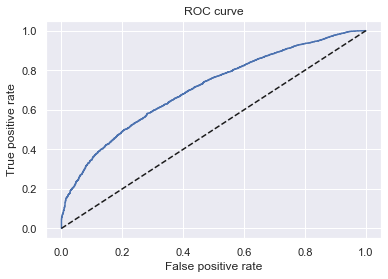

In [177]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [178]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7064056285288377

## From the ROC curve we see that although the accuracy of model is very high from accuracy rate,the roc curve shows it is a fair value and we can rule overfit issue from this metric.

## Gini and Kolmogorov _ smirnov

In [180]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [181]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [182]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.592108,0
1,42396,0,0.629491,0
2,42038,1,0.647084,0
3,41739,0,0.677881,0
4,42359,0,0.679107,0


In [184]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index+1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] -  df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [187]:
df_actual_predicted_probs['Cumulative Perc Population']=df_actual_predicted_probs['Cumulative N Population'] /(df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

Text(0.5, 1.0, 'Gini')

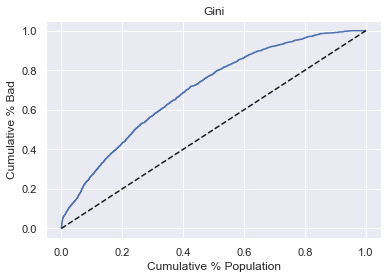

In [190]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'],linestyle='--',color='k')   
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [191]:
Gini = AUROC *2 -1
Gini

0.4128112570576754

Text(0.5, 1.0, 'Kolmogorov - Smirnov')

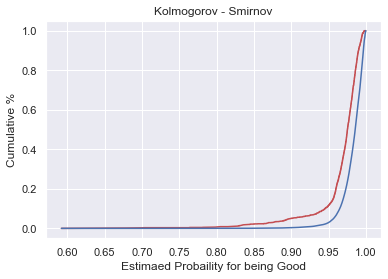

In [192]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Bad'],color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'],color='b')
plt.xlabel('Estimaed Probaility for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov - Smirnov')

In [193]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29967416572134364